# shapefile_to_datashader

Some code to process timestamped geospatial trajectories into a 3D array for easier use downstream in visualization packages or other software

##### Imports

In [1]:
import numpy as np
import pandas as pd
import shapefile

import datashader as ds
import datashader.transfer_functions as tf
from datashader.utils import export_image

from colorcet import fire
from matplotlib import cm

Data source:
    Download the dataset from the Montreal open data portal:
        http://donnees.ville.montreal.qc.ca/dataset/mtl-trajet

##### Paths

In [2]:
base_path = 'Z:\\Open_data_sets\\Montreal_open_data\\mtlTrajet\\2017\\'
shp_filepath = base_path + 'trajets_mtl_trajet_2017.shp'

### Load the shapefile

In [3]:
mtlTrajet_sf = shapefile.Reader(shp_filepath)
shapes = mtlTrajet_sf.shapes()
print(type(shapes))
print(np.shape(shapes))

<class 'list'>
(185285,)


##### 'Wrangle' the shapefile points into a NumPy array.

In [4]:
# This may take a LONG time.
array_shapes = np.empty([1,2]) 

for i in range(0,len(shapes)-1):
    curr_coords = np.asarray(shapes[i].points)
    array_shapes = np.row_stack((array_shapes, curr_coords)) 
    
print(np.shape(array_shapes)) 

(29068826, 2)


##### 'Wrangle' the NumPy array to a Pandas DataFrame to visualize in DataShader

In [5]:
df = pd.DataFrame(data=array_shapes[1:,:],columns=['x','y'])
display(df)

,x,y
0,-73.651166,45.544501
1,-73.651227,45.544519
2,-73.653826,45.545258
3,-73.654753,45.545521
4,-73.654917,45.545565
5,-73.654615,45.546086
6,-73.653650,45.545816
7,-73.653426,45.545753
8,-73.653625,45.545809
9,-73.653650,45.545816


##### Set the GPS bounds of the plot

In [6]:
xmin = -74
xmax = -73.4
ymin = 45.3
ymax = 45.8
x_range = [xmin, xmax]
y_range = [ymin, ymax]

##### DataShader aggregate plot

C:\Users\tyler\Anaconda3\lib\site-packages\datashader\transfer_functions.py:146: RuntimeWarning: invalid value encountered in log1p
  _interpolate_lookup = {'log': lambda d, m: np.log1p(np.where(m, np.nan, d)),
C:\Users\tyler\Anaconda3\lib\site-packages\matplotlib\colors.py:504: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


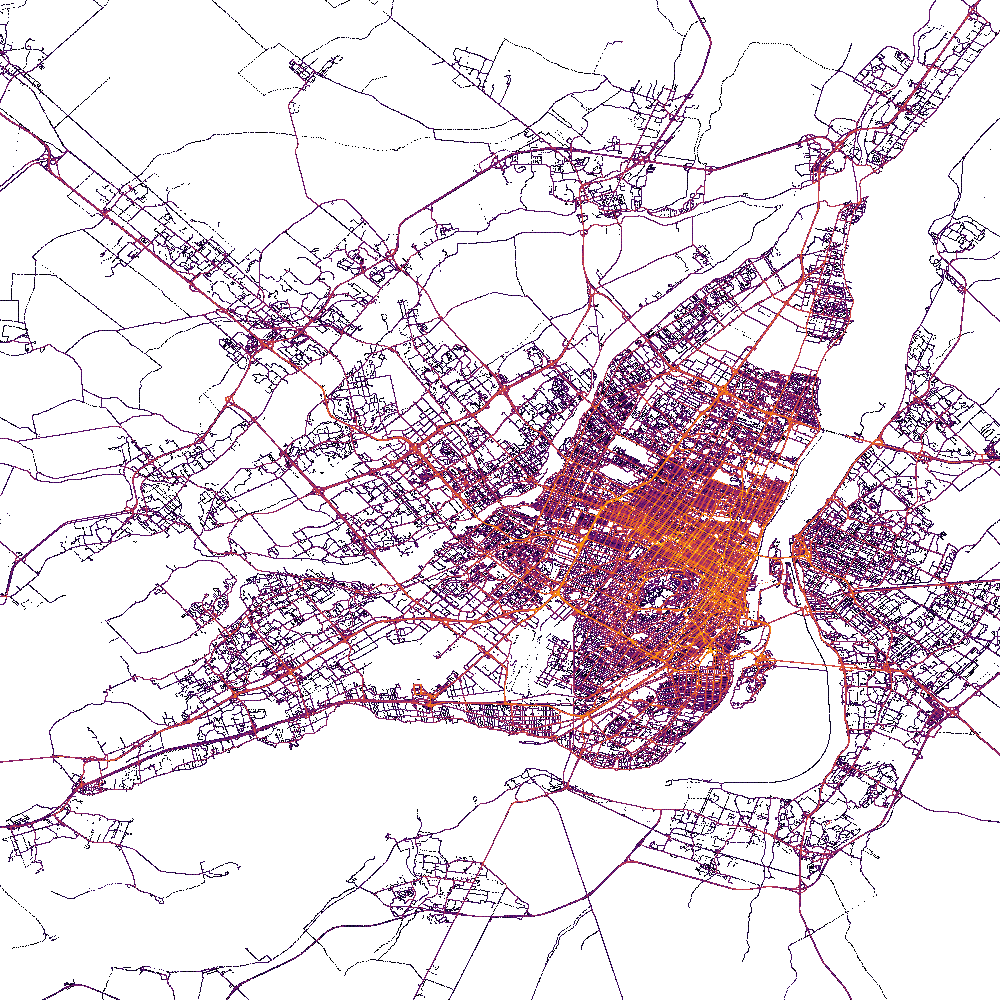

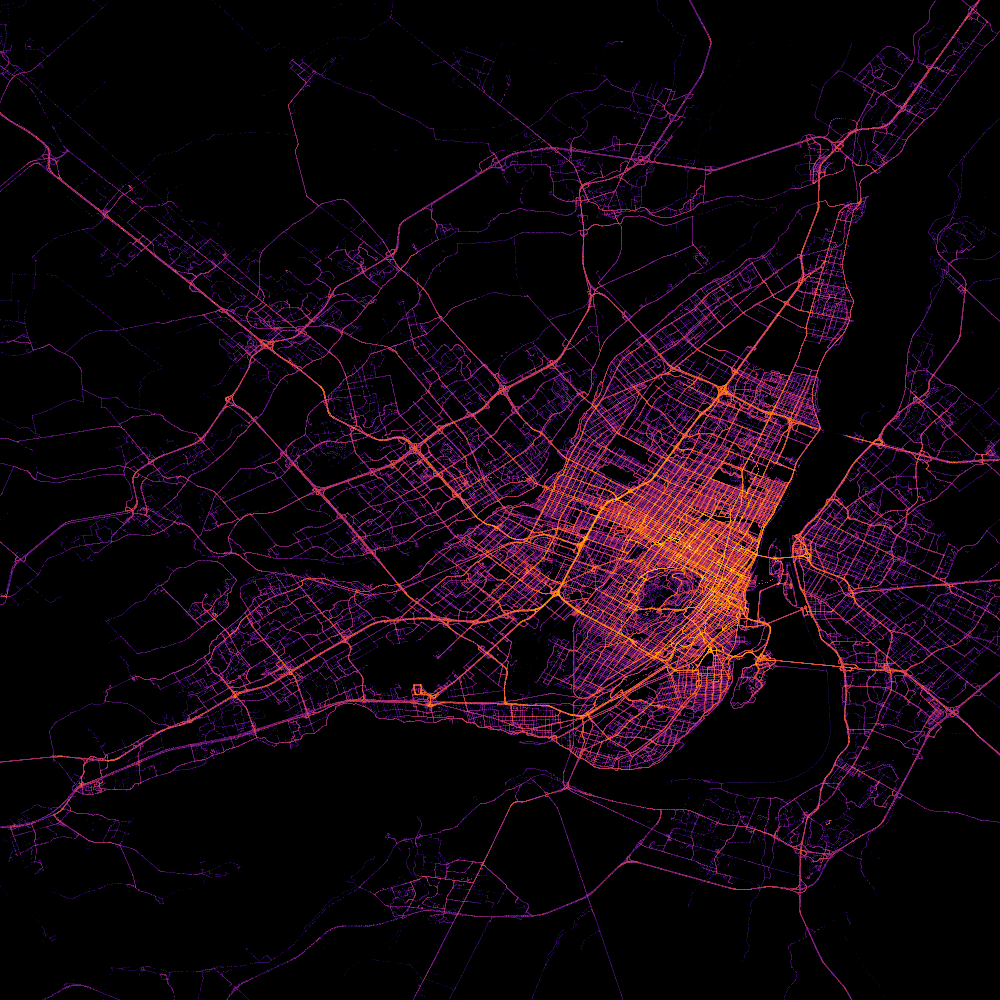

In [7]:
cvs = ds.Canvas(plot_width=1000, plot_height=1000,x_range=x_range, y_range=y_range)  
agg = cvs.points(df, 'x', 'y')

img = tf.shade(agg, cmap=cm.inferno, how='log')
display(img)

figname = 'datashader_image'
export_image(img, figname, background="black")   